# Self-Healing Classification DAG - Demo
This notebook demonstrates the self-healing classification system with visualizations and examples.

In [1]:
# Install required packages
!pip install -q -r requirements.txt

In [2]:
# Import necessary libraries
import os
import sys
import logging
import matplotlib.pyplot as plt
from classification_dag import SentimentClassifier
from IPython.display import Image

c:\Users\ragha\anaconda3\envs\self-healing-dag\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## System Architecture

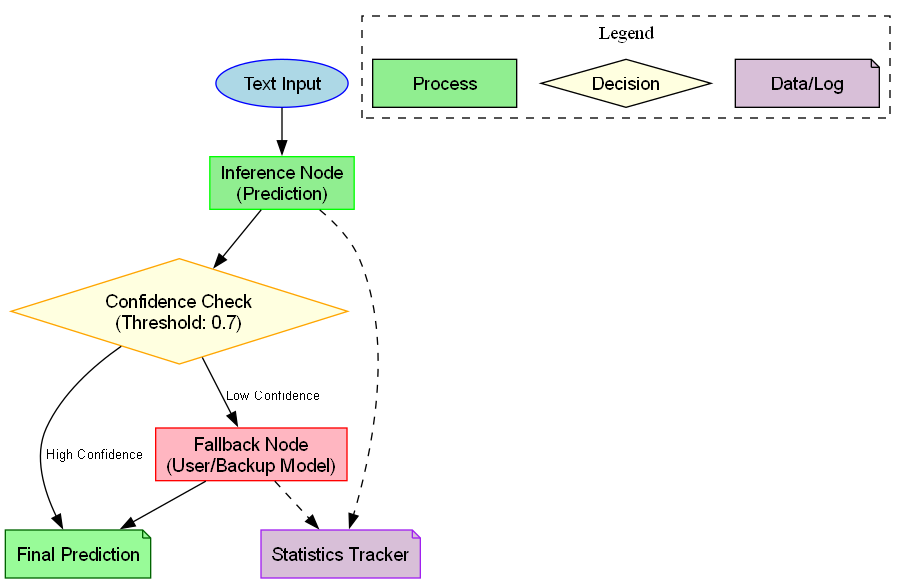

In [3]:
# Display the DAG diagram
display(Image(filename='dag.png'))

## Initialize the Classifier

In [4]:
# Initialize with backup model for demonstration
classifier = SentimentClassifier(use_backup_model=True)
print("Classifier initialized with backup model for fallback.")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2025-11-05 21:45:37,275 - classification_dag - ERROR - Error initializing backup model: name 'pipeline' is not defined
2025-11-05 21:45:37,275 - classification_dag - INFO - Initialized SentimentClassifier with model from ./fine_tuned_model


Classifier initialized with backup model for fallback.


## Example Predictions

In [ ]:
def predict_example(text):
    print(f"\nInput: {text}")
    result = classifier.predict(text)
    if result["confidence"] < 0.7:
        print("[ConfidenceCheckNode] Confidence too low. Triggering fallback...")
        result = classifier.fallback_prediction(text, result["confidence"])
        print(f"Final Label: {result['label']} (Corrected via fallback)")
    else:
        print(f"Final Label: {result['label']} (Confidence: {result['confidence']*100:.1f}%)")
    return result

In [12]:
# Example 1: High confidence prediction
example1 = "I absolutely loved this movie! The acting was superb."
predict_example(example1)


Input: I absolutely loved this movie! The acting was superb.
[InferenceNode] Predicted label: Positive | Confidence: 53%
[ConfidenceCheckNode] Confidence too low. Triggering fallback...
[ConfidenceCheckNode] Confidence too low. Triggering fallback...
[FallbackNode] Could you clarify your intent? Was this a negative review?


2025-11-05 21:50:55,317 - classification_dag - INFO - User provided label: Positive


Final Label: Positive (Corrected via user clarification)
Final Label: Positive (Corrected via fallback)


{'text': 'I absolutely loved this movie! The acting was superb.',
 'label': 'Positive',
 'confidence': 1.0,
 'is_fallback': True,
 'original_confidence': 0.5394127368927002,
 'timestamp': '2025-11-05T21:50:55.318732'}

In [13]:
# Example 2: Low confidence prediction (will trigger fallback)
example2 = "The movie was okay, but not great."
predict_example(example2)


Input: The movie was okay, but not great.
[InferenceNode] Predicted label: Negative | Confidence: 52%
[ConfidenceCheckNode] Confidence too low. Triggering fallback...
[ConfidenceCheckNode] Confidence too low. Triggering fallback...
[FallbackNode] Could you clarify your intent? Was this a negative review?


2025-11-05 21:51:07,223 - classification_dag - INFO - User provided label: Negative


Final Label: Negative (Corrected via user clarification)
Final Label: Negative (Corrected via fallback)


{'text': 'The movie was okay, but not great.',
 'label': 'Negative',
 'confidence': 1.0,
 'is_fallback': True,
 'original_confidence': 0.5265340209007263,
 'timestamp': '2025-11-05T21:51:07.224924'}

## Statistics and Visualizations

2025-11-05 21:48:43,429 - classification_dag - INFO - Statistics saved to statistics


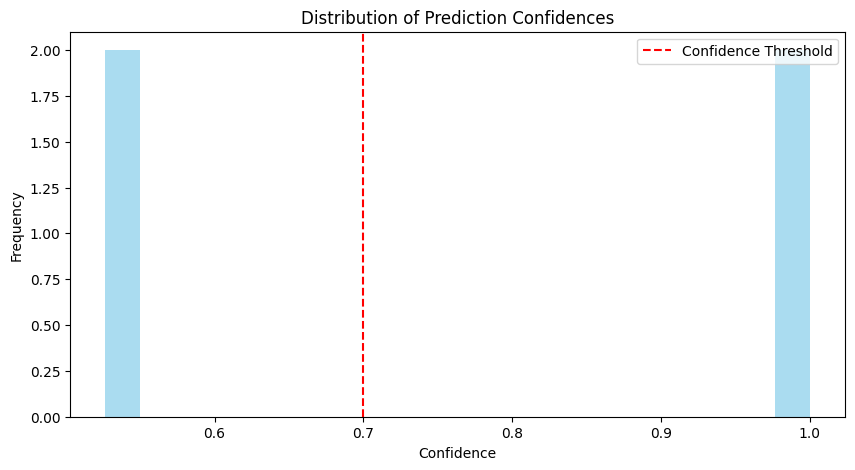

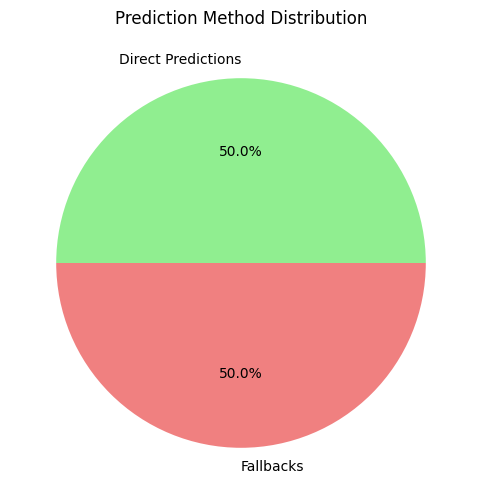

In [9]:
# Generate and display statistics
classifier.generate_statistics()

# Display the generated visualizations
def display_statistics():
    # Confidence Distribution
    plt.figure(figsize=(10, 5))
    plt.hist(classifier.confidences, bins=20, alpha=0.7, color='skyblue')
    plt.axvline(x=0.7, color='red', linestyle='--', label='Confidence Threshold')
    plt.title('Distribution of Prediction Confidences')
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    # Fallback Statistics
    if classifier.fallback_count > 0:
        fallback_rate = (classifier.fallback_count / len(classifier.predictions)) * 100
        plt.figure(figsize=(6, 6))
        plt.pie(
            [100 - fallback_rate, fallback_rate],
            labels=['Direct Predictions', 'Fallbacks'],
            autopct='%1.1f%%',
            colors=['lightgreen', 'lightcoral']
        )
        plt.title('Prediction Method Distribution')
        plt.show()

display_statistics()

## Try Your Own Text


Input: The movie was painfully slow and boring.
[InferenceNode] Predicted label: Negative | Confidence: 54%
[ConfidenceCheckNode] Confidence too low. Triggering fallback...
[ConfidenceCheckNode] Confidence too low. Triggering fallback...
[FallbackNode] Could you clarify your intent? Was this a negative review?


2025-11-05 21:50:13,873 - classification_dag - INFO - User provided label: Negative


Final Label: Negative (Corrected via user clarification)
Final Label: Negative (Corrected via fallback)


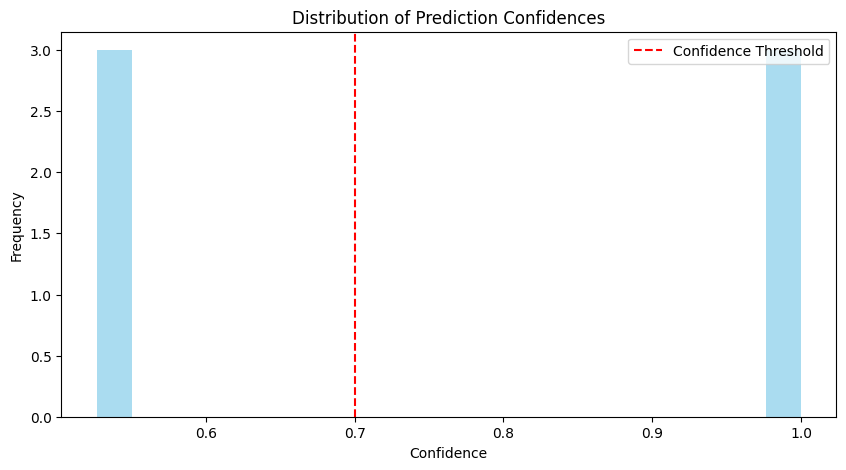

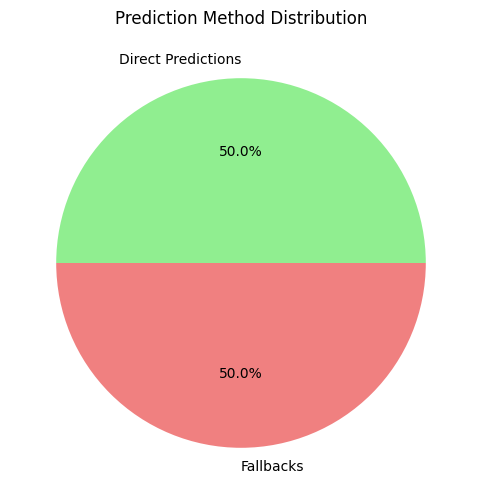

KeyboardInterrupt: Interrupted by user

In [11]:
# Interactive demo
while True:
    text = input("\nEnter your text for sentiment analysis (or 'exit' to quit): ")
    if text.lower() in ['exit', 'quit']:
        break
    predict_example(text)
    # Update and show statistics
    display_statistics()